In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
bonn_trips = pd.read_csv("Data/bonn_trips.csv")

In [3]:
bonn_trips

,Unnamed: 0,index_start,p_place_type_start,datetime_start,b_number_start,trip_start,p_uid_start,p_bikes_x,latitude_start,longitude_start,...,month,hour,minute,temperature °C,relative_humidity,precipitaion_level (mm),precipitation y/n,average_wind_speed (m/s),geometry,h3_hex_id
0,0,3,12,2019-01-20 03:20:00,44952,start,12040694,1,50.703284,7.154586,...,1,3,20,-5.6,86.0,0.0,0,2.4,POINT (7.154585907874099 50.703284257875),891fa11ad13ffff
1,1,25,12,2019-01-20 03:08:00,44931,start,12093216,1,50.747953,7.119311,...,1,3,8,-5.6,86.0,0.0,0,2.4,POINT (7.1193110416667 50.74795333333299),891fa111553ffff
2,2,75,0,2019-01-20 03:06:00,44594,start,10044445,2,50.736217,7.094604,...,1,3,6,-5.6,86.0,0.0,0,2.4,POINT (7.0946037769318 50.736217480959),891fa1116b7ffff
3,3,177,12,2019-01-20 03:52:00,44966,start,12069877,1,50.708533,7.105807,...,1,3,52,-5.6,86.0,0.0,0,2.4,POINT (7.1058066760932 50.70853309380499),891fa11120fffff
4,4,409,12,2019-01-20 03:30:00,44637,start,12098186,1,50.732503,7.097200,...,1,3,30,-5.6,86.0,0.0,0,2.4,POINT (7.097199722222201 50.732503333333),891fa1116afffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049308,1049367,2594307,12,2019-12-31 04:00:00,44761,start,26497047,1,50.725658,7.101135,...,12,4,0,1.3,68.0,0.0,0,1.4,POINT (7.101135 50.725657777778),891fa111627ffff
1049309,1049368,2594353,12,2019-12-31 04:07:00,45339,start,26497021,1,50.743849,7.080702,...,12,4,7,1.3,68.0,0.0,0,1.4,POINT (7.0807016666667 50.743848888889),891fa1c4937ffff
1049310,1049369,2594928,12,2019-12-31 04:37:00,45108,start,26496362,1,50.742822,7.096499,...,12,4,37,1.3,68.0,0.0,0,1.4,POINT (7.0964994444444 50.742822222222),891fa11140bffff
1049311,1049370,2596104,12,2019-12-31 04:52:00,45396,start,26493966,1,50.736449,7.096370,...,12,4,52,1.3,68.0,0.0,0,1.4,POINT (7.096369999999999 50.736448888889),891fa1116b7ffff


4. Predictive Analytics with Support Vector Machines:

Develop two prediction models that predict a) bike rental demand and b) bike availability in spatio-temporal resolution. 
In other words, your method should predict for each hexagon and time-basket (e.g., 08am-11.59am) the bike demand and number of available vehicles.

– Simply start without a kernel. Then, gradually make your model complex by integrating different
kind of kernels. Also, use grid search to find optimal values for your hyperparameters.

– How good is your model? Evaluate your model’s performance and comment on its shortfalls.

– Show how you model’s performance varies as you increase or decrease temporal resolution for the
following period length:1h, 2h, 6h, 24h. Also, vary the length of the hexagon edges.

– How could the model be improved further? Explain some of the improvement levers that you might
focus on in a follow-up project.

### Determination of a time basket

In [4]:
def determinate_timebasket(hour):
    #from 5.00 to 10.59 : Morning
    if hour>4 and hour<11:
        x=0
        return x
    #from 11.00 to 12.59 : noon
    if hour>10 and hour<13:
        x=1
        return x
    #from 13.00 to 17.59 : afternoon
    if hour>12 and hour<18:
        x=2
        return x
    #from 18.00 to 22.59 : evening
    if hour>17 and hour<23:
        x=3
        return x
    #from 23.00 to 4.59 : night
    if (hour>22 and hour<25)or hour<5:
        x=4
        return x


In [5]:
bonn_trips_new = bonn_trips

In [6]:
bonn_trips_new['time_basket'] = bonn_trips_new['hour'].apply(lambda x: determinate_timebasket(x))

In [7]:
bonn_trips_new.head(10)

,Unnamed: 0,index_start,p_place_type_start,datetime_start,b_number_start,trip_start,p_uid_start,p_bikes_x,latitude_start,longitude_start,...,hour,minute,temperature °C,relative_humidity,precipitaion_level (mm),precipitation y/n,average_wind_speed (m/s),geometry,h3_hex_id,time_basket
0,0,3,12,2019-01-20 03:20:00,44952,start,12040694,1,50.703284,7.154586,...,3,20,-5.6,86.0,0.0,0,2.4,POINT (7.154585907874099 50.703284257875),891fa11ad13ffff,4
1,1,25,12,2019-01-20 03:08:00,44931,start,12093216,1,50.747953,7.119311,...,3,8,-5.6,86.0,0.0,0,2.4,POINT (7.1193110416667 50.74795333333299),891fa111553ffff,4
2,2,75,0,2019-01-20 03:06:00,44594,start,10044445,2,50.736217,7.094604,...,3,6,-5.6,86.0,0.0,0,2.4,POINT (7.0946037769318 50.736217480959),891fa1116b7ffff,4
3,3,177,12,2019-01-20 03:52:00,44966,start,12069877,1,50.708533,7.105807,...,3,52,-5.6,86.0,0.0,0,2.4,POINT (7.1058066760932 50.70853309380499),891fa11120fffff,4
4,4,409,12,2019-01-20 03:30:00,44637,start,12098186,1,50.732503,7.097200,...,3,30,-5.6,86.0,0.0,0,2.4,POINT (7.097199722222201 50.732503333333),891fa1116afffff,4
5,5,559,12,2019-01-20 03:26:00,44642,start,12099429,1,50.728528,7.076081,...,3,26,-5.6,86.0,0.0,0,2.4,POINT (7.0760811111111 50.728527777778),891fa1116c7ffff,4
6,6,899,12,2019-01-20 03:11:00,44953,start,12097991,1,50.742164,7.066421,...,3,11,-5.6,86.0,0.0,0,2.4,POINT (7.0664205555556 50.742164444444),891fa1c4903ffff,4
7,7,945,12,2019-01-20 03:50:00,44597,start,12097572,1,50.739404,7.117717,...,3,50,-5.6,86.0,0.0,0,2.4,POINT (7.1177172222222 50.739404444444),891fa111087ffff,4
8,8,985,12,2019-01-20 03:26:00,44936,start,12097106,1,50.744732,7.095918,...,3,26,-5.6,86.0,0.0,0,2.4,POINT (7.0959180555556 50.74473222222201),891fa11140bffff,4
9,9,1433,12,2019-01-20 03:32:00,44720,start,12100574,1,50.733480,7.098862,...,3,32,-5.6,86.0,0.0,0,2.4,POINT (7.0988616666667 50.73348),891fa1116a7ffff,4


### Determination of the Demand for for each hexagon and time-basket

In [10]:
grouped_trips = bonn_trips_new.groupby(['time_basket', 'h3_hex_id'], as_index = False)

In [11]:
grouped_trips2 = grouped_trips.count()

In [ ]:
grouped_trips2.describe()

In [154]:
grouped_trips2.groups

{(0, '891fa10108bffff'): Int64Index([1043777], dtype='int64'),
 (0, '891fa10140bffff'): Int64Index([1028983, 1028992], dtype='int64'),
 (0, '891fa10144fffff'): Int64Index([159789], dtype='int64'),
 (0, '891fa101463ffff'): Int64Index([710071, 710392], dtype='int64'),
 (0,
  '891fa10148bffff'): Int64Index([177736, 177737, 715655, 965647], dtype='int64'),
 (0, '891fa101493ffff'): Int64Index([752755], dtype='int64'),
 (0,
  '891fa1014c3ffff'): Int64Index([600608, 771621, 774635, 783035, 783726, 806580, 815414, 819011,
             826495],
            dtype='int64'),
 (0,
  '891fa1014d3ffff'): Int64Index([335707, 373560, 392446, 675206, 713691], dtype='int64'),
 (0, '891fa1014d7ffff'): Int64Index([965291], dtype='int64'),
 (0, '891fa10160fffff'): Int64Index([472638, 491329, 499086], dtype='int64'),
 (0, '891fa101653ffff'): Int64Index([806382], dtype='int64'),
 (0,
  '891fa103213ffff'): Int64Index([269628, 317888, 401315, 405102, 418642, 419088, 423836, 875053], dtype='int64'),
 (0, '891fa1

In [12]:
grouped_trips2 = grouped_trips2[['time_basket', 'h3_hex_id', 'Unnamed: 0']]

In [13]:
grouped_trips2 = grouped_trips2.rename(columns={"Unnamed: 0": "Demand"})

In [14]:
grouped_trips2

,time_basket,h3_hex_id,Demand
0,0,891fa10108bffff,1
1,0,891fa10140bffff,2
2,0,891fa10144fffff,1
3,0,891fa101463ffff,2
4,0,891fa10148bffff,4
...,...,...,...
6148,4,891fa1c6bafffff,2
6149,4,891fa1c6cb7ffff,1
6150,4,891fa1c70cbffff,1
6151,4,891fa1ccd2fffff,1


In [15]:
bonn_trips_new.columns

Index(['Unnamed: 0', 'index_start', 'p_place_type_start', 'datetime_start',
       'b_number_start', 'trip_start', 'p_uid_start', 'p_bikes_x',
       'latitude_start', 'longitude_start', 'p_name_start', 'p_number_start',
       'p_bike_start', 'p_spot_start', 'index_end', 'p_place_type_end',
       'datetime_end', 'b_number_end', 'trip_end', 'p_uid_end', 'p_bikes_y',
       'latitude_end', 'longitude_end', 'p_name_end', 'p_number_end',
       'p_bike_end', 'p_spot_end', 'trip_duration', 'weekday', 'distance',
       'weekend', 'day', 'month', 'hour', 'minute', 'temperature °C',
       'relative_humidity', 'precipitaion_level (mm)', 'precipitation y/n',
       'average_wind_speed (m/s)', 'geometry', 'h3_hex_id', 'time_basket'],
      dtype='object')

In [16]:
#Creation of the table for the demand prediction with useful features
demand_prediction_df = bonn_trips_new[['datetime_start','weekday','weekend', 'day', 'month', 'temperature °C','relative_humidity', 'precipitaion_level (mm)', 'precipitation y/n','average_wind_speed (m/s)', 'geometry', 'h3_hex_id', 'time_basket']].merge(grouped_trips2, on=['time_basket', 'h3_hex_id'], how='left')

In [17]:
demand_prediction_df

,datetime_start,weekday,weekend,day,month,temperature °C,relative_humidity,precipitaion_level (mm),precipitation y/n,average_wind_speed (m/s),geometry,h3_hex_id,time_basket,Demand
0,2019-01-20 03:20:00,6,True,20,1,-5.6,86.0,0.0,0,2.4,POINT (7.154585907874099 50.703284257875),891fa11ad13ffff,4,126
1,2019-01-20 03:08:00,6,True,20,1,-5.6,86.0,0.0,0,2.4,POINT (7.1193110416667 50.74795333333299),891fa111553ffff,4,106
2,2019-01-20 03:06:00,6,True,20,1,-5.6,86.0,0.0,0,2.4,POINT (7.0946037769318 50.736217480959),891fa1116b7ffff,4,936
3,2019-01-20 03:52:00,6,True,20,1,-5.6,86.0,0.0,0,2.4,POINT (7.1058066760932 50.70853309380499),891fa11120fffff,4,282
4,2019-01-20 03:30:00,6,True,20,1,-5.6,86.0,0.0,0,2.4,POINT (7.097199722222201 50.732503333333),891fa1116afffff,4,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049308,2019-12-31 04:00:00,1,False,31,12,1.3,68.0,0.0,0,1.4,POINT (7.101135 50.725657777778),891fa111627ffff,4,483
1049309,2019-12-31 04:07:00,1,False,31,12,1.3,68.0,0.0,0,1.4,POINT (7.0807016666667 50.743848888889),891fa1c4937ffff,4,261
1049310,2019-12-31 04:37:00,1,False,31,12,1.3,68.0,0.0,0,1.4,POINT (7.0964994444444 50.742822222222),891fa11140bffff,4,402
1049311,2019-12-31 04:52:00,1,False,31,12,1.3,68.0,0.0,0,1.4,POINT (7.096369999999999 50.736448888889),891fa1116b7ffff,4,936


In [18]:
def transform_bool(x):
    if x == True:
        return 1
    else:
        return 0

In [19]:
demand_prediction_df['weekend'] = demand_prediction_df['weekend'].apply(lambda x: transform_bool(x))

## Demand Prediction

#### Correlation Matrix of the Features 

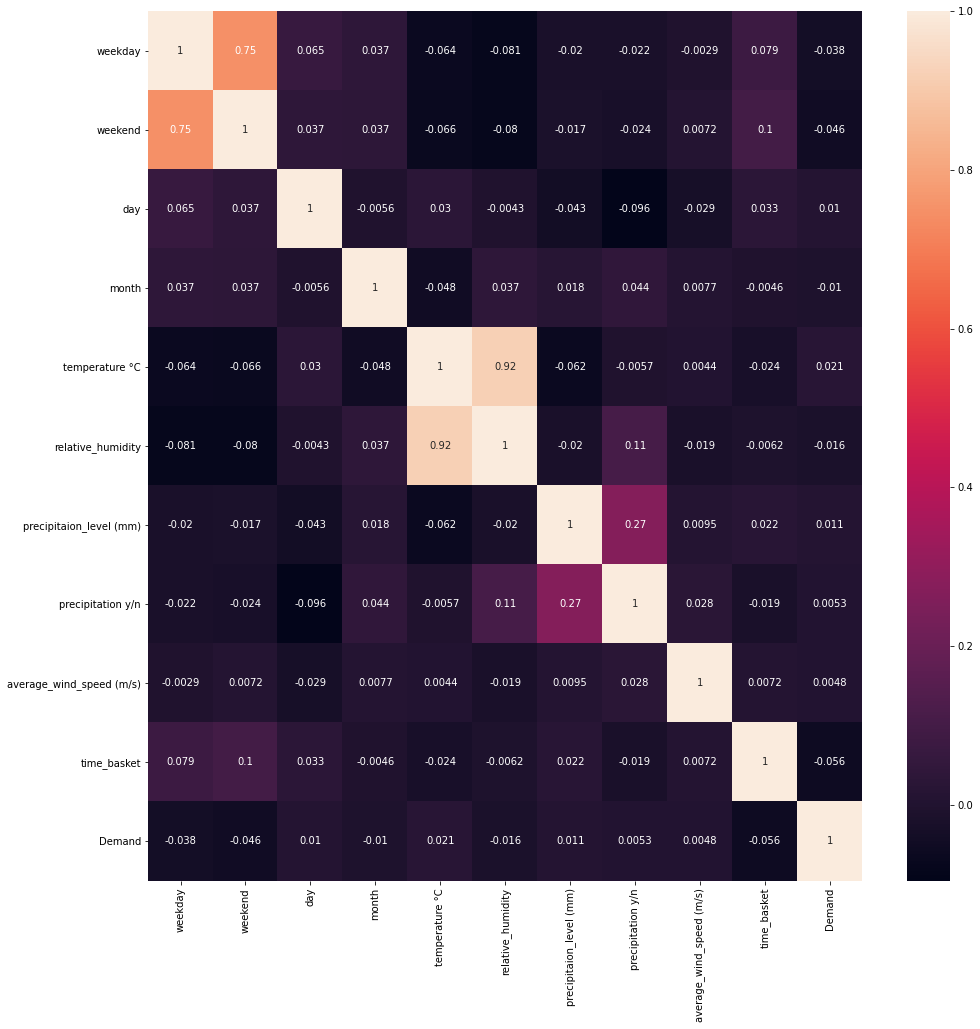

In [20]:
corrMatrix = demand_prediction_df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrMatrix, annot=True)
#fig, ax = plt.subplots()
#fig.set_size_inches(11.7, 8.27)
plt.show()

### Feature Selection and Encoding

In [21]:
demand_prediction_df.columns

Index(['datetime_start', 'weekday', 'weekend', 'day', 'month',
       'temperature °C', 'relative_humidity', 'precipitaion_level (mm)',
       'precipitation y/n', 'average_wind_speed (m/s)', 'geometry',
       'h3_hex_id', 'time_basket', 'Demand'],
      dtype='object')

In [22]:
demand_prediction_sample = demand_prediction_df.sample(frac=0.3, replace=True, random_state=1)

In [78]:
demand_prediction_sample.isnull().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314794 entries, 128037 to 101035
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   datetime_start            314794 non-null  object 
 1   weekday                   314794 non-null  int64  
 2   weekend                   314794 non-null  int64  
 3   day                       314794 non-null  int64  
 4   month                     314794 non-null  int64  
 5   temperature °C            314794 non-null  float64
 6   relative_humidity         314794 non-null  float64
 7   precipitaion_level (mm)   314794 non-null  float64
 8   precipitation y/n         314794 non-null  int64  
 9   average_wind_speed (m/s)  313717 non-null  float64
 10  geometry                  314794 non-null  object 
 11  h3_hex_id                 314794 non-null  object 
 12  time_basket               314794 non-null  int64  
 13  Demand                    314794 non-nu

In [83]:
X= demand_prediction_sample[['weekend', 'month', 'temperature °C', 'relative_humidity', 
                         'precipitaion_level (mm)', 
                             #'average_wind_speed (m/s)', because of NaN values
                           'h3_hex_id', 'time_basket']]
y = demand_prediction_sample['Demand']

In [86]:
#SCALING
#category values:
#The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. 
#This has the benefit of not weighting a value improperly.
X_categoric = pd.get_dummies(X, columns = ['weekend', 'month', 'h3_hex_id', 'time_basket'])
X_categoric = np.asarray(X_categoric)
#numeric values:
scaler = StandardScaler()
X_numeric = X[['temperature °C', 'relative_humidity','precipitaion_level (mm)', 
               #'average_wind_speed (m/s)'
              ]]
X_numeric = scaler.fit_transform(X_numeric)
#X_numeric = X_numeric.astype(np.float)
X_numeric = np.asarray(X_numeric)

In [87]:
len(X_numeric)

314794

In [88]:
len(X_categoric)

314794

In [89]:
X_scaled = np.concatenate([X_categoric, X_numeric], axis=1)

In [90]:
#pd.isnull(X_scaled).sum() > 0

False

In [91]:
X_scaled.shape

(314794, 1355)

In [92]:
print(X_scaled)

[[ 1.01000000e+01  6.50000000e+01  0.00000000e+00 ... -1.26715887e-02
   2.14328476e-02 -1.26853209e-01]
 [ 2.41000000e+01  4.60000000e+01  0.00000000e+00 ...  2.19137064e-01
  -2.66692139e-01 -1.26853209e-01]
 [ 2.40000000e+01  4.50000000e+01  0.00000000e+00 ...  2.17481288e-01
  -2.81856612e-01 -1.26853209e-01]
 ...
 [ 1.82000000e+01  6.10000000e+01  0.00000000e+00 ...  1.21446274e-01
  -3.92250443e-02 -1.26853209e-01]
 [ 6.60000000e+00  7.60000000e+01  0.00000000e+00 ... -7.06237518e-02
   1.88242050e-01 -1.26853209e-01]
 [ 1.00000000e+01  6.10000000e+01  0.00000000e+00 ... -1.43273648e-02
  -3.92250443e-02 -1.26853209e-01]]


### SVC Model

In [93]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
X_train , X_test , y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3,random_state=0)

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test, y_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
Print('\n','R2: ', r2, '\n','Mean absolute error: ', mae,'\n','Mean squared error: ', mse )